# NBA Players Salary Prediction Model
**PIC16A Final Project**

*Group member: Joanne Qiu, Yupei Hu, Shikang Yang*

## Features Engineering

In [308]:
import pandas as pd
import numpy as np
from cleaner import Cleaner

In [309]:
# import two datasets and clean the data with the Cleaner class
contract_22 = Cleaner("21-22_contract.csv")

contract_22.keepColumns(["Player", "2021-22"])
contract_22.changeName(["2021-22"],["Salary"])
contract_22.cleanPlayerName()

In [310]:
player_21 = Cleaner("all_seasons.csv")

player_21.getSeason("2020-21")
player_21.keepColumns(["player_name","team_abbreviation","age", "player_height", "player_weight", "pts", "reb", "ast", "oreb_pct", "dreb_pct",
          "usg_pct", "ts_pct"])
player_21.changeName(["player_name", "team_abbreviation"], ["Player", "team"])

In [311]:
# clean the salary column
try:
    contract_22.cleanSalary()
except TypeError:
    print("There were NA values")
    contract_22.dropNA()
    contract_22.cleanSalary()
finally:
    print('Finish cleaning the salary column')

There were NA values
Finish cleaning the salary column


In [312]:
# combine two datasets together
try:
    nba = contract_22.merge(player_21)
except ValueError:
    print("There were duplicated players")
    player_21.unique("Player")
    contract_22.unique("Player")
    nba = contract_22.merge(player_21)
finally:
    print("Finish merging")

There were duplicated players
Finish merging


In [313]:
# done data cleaning
nba.head(10)

,Player,Salary,team,age,player_height,player_weight,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct
0,Stephen Curry,45780966.0,GSW,33.0,190.50,83.914520,32.0,5.5,5.8,0.013,0.135,0.331,0.655
1,John Wall,44310840.0,HOU,30.0,190.50,95.254320,20.6,3.2,6.9,0.012,0.084,0.316,0.503
2,Russell Westbrook,44211146.0,WAS,32.0,190.50,90.718400,22.2,11.5,11.7,0.043,0.249,0.295,0.509
3,James Harden,43848000.0,BKN,31.0,195.58,99.790240,24.6,7.9,10.8,0.023,0.191,0.283,0.618
4,LeBron James,41180544.0,LAL,36.0,205.74,113.398000,25.0,7.7,7.8,0.020,0.202,0.310,0.602
5,Kevin Durant,40918900.0,BKN,32.0,208.28,108.862080,26.9,7.1,5.6,0.012,0.180,0.303,0.666
6,Giannis Antetokounmpo,39344970.0,MIL,26.0,210.82,109.769264,28.1,11.0,5.9,0.048,0.264,0.320,0.633
7,Paul George,39344970.0,LAC,31.0,203.20,99.790240,23.3,6.6,5.2,0.026,0.171,0.296,0.598
8,Damian Lillard,39344900.0,POR,30.0,187.96,88.450440,28.8,4.2,7.5,0.012,0.104,0.306,0.623
9,Kawhi Leonard,39344900.0,LAC,30.0,200.66,102.058200,24.8,6.5,5.2,0.034,0.161,0.282,0.622


## Distribution Graph

In [314]:
# use Plotly to create an interactive plot
import plotly.express as px
fig = px.scatter(nba, x = "Salary", y= "pts", color = "team", hover_name = "Player")
fig.show()

array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'player_height'}>],
       [<AxesSubplot:title={'center':'player_weight'}>,
        <AxesSubplot:title={'center':'pts'}>,
        <AxesSubplot:title={'center':'reb'}>],
       [<AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'oreb_pct'}>,
        <AxesSubplot:title={'center':'dreb_pct'}>],
       [<AxesSubplot:title={'center':'usg_pct'}>,
        <AxesSubplot:title={'center':'ts_pct'}>, <AxesSubplot:>]],
      dtype=object)

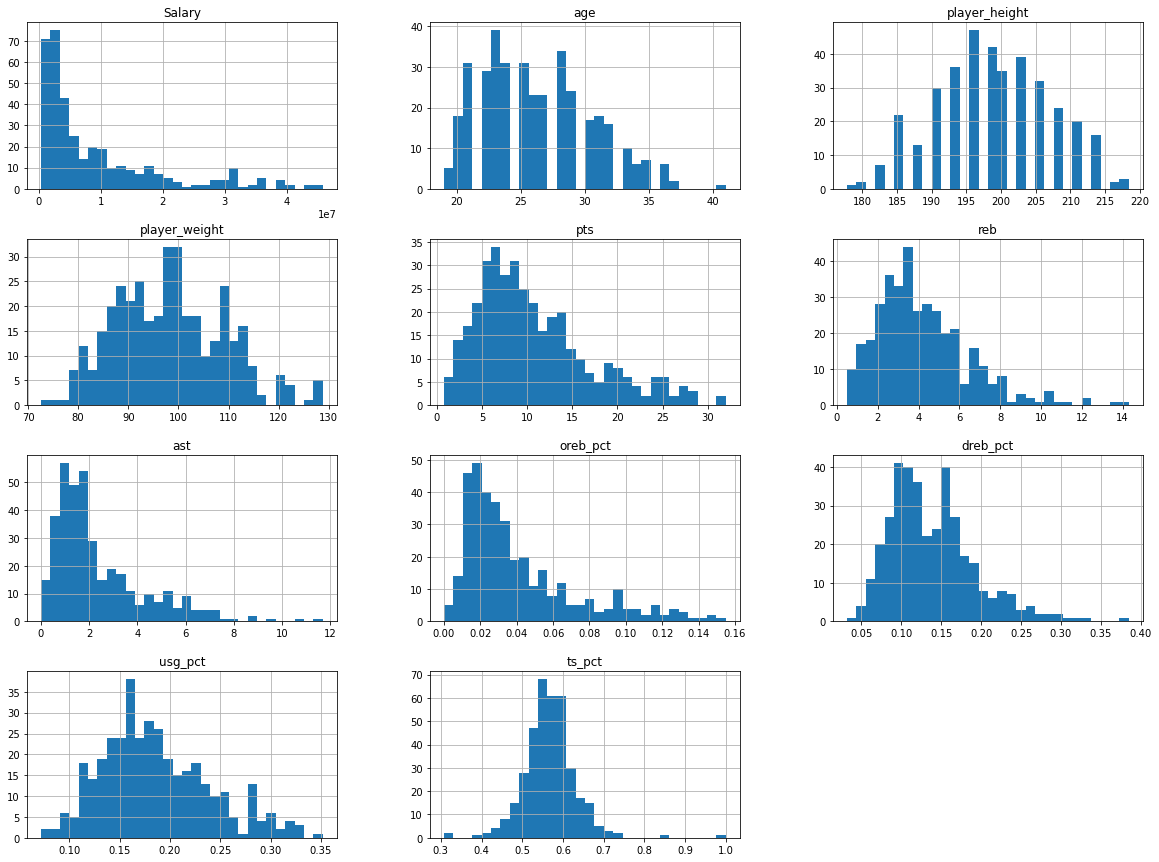

In [315]:
# create histograms to see the distributions of different variables
import matplotlib.pyplot as plot
nba.hist(bins=30, figsize=(20,15))

## Basic Statistcs

In [316]:
nba.describe()

,Salary,age,player_height,player_weight,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct
count,3.710000e+02,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,9.299129e+06,26.191375,198.832022,98.282750,10.752561,4.195418,2.380593,0.041022,0.138997,0.186016,0.567057
std,1.015230e+07,4.288707,8.175109,10.888741,6.371895,2.277174,1.940089,0.031848,0.053988,0.054193,0.063722
min,3.776450e+05,19.000000,177.800000,72.574720,0.800000,0.500000,0.000000,0.000000,0.032000,0.072000,0.308000
25%,2.179557e+06,23.000000,193.040000,90.718400,6.200000,2.600000,1.000000,0.018500,0.099000,0.147000,0.532500
50%,4.878049e+06,26.000000,198.120000,97.522280,9.200000,3.700000,1.800000,0.029000,0.130000,0.179000,0.566000
75%,1.256648e+07,29.000000,205.740000,106.140528,14.050000,5.400000,3.200000,0.054000,0.167000,0.221000,0.599000
max,4.578097e+07,41.000000,218.440000,128.820128,32.000000,14.300000,11.700000,0.155000,0.385000,0.352000,1.000000


In [317]:
nba.corr()

,Salary,age,player_height,player_weight,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct
Salary,1.000000,0.283098,0.009812,0.064141,0.770348,0.473493,0.662070,-0.115231,0.106043,0.593529,0.197909
age,0.283098,1.000000,-0.030722,0.125483,0.114950,0.117872,0.201222,-0.039545,0.066280,0.022302,0.262016
player_height,0.009812,-0.030722,1.000000,0.747276,-0.072728,0.495566,-0.357682,0.607054,0.647030,-0.093631,0.257208
player_weight,0.064141,0.125483,0.747276,1.000000,-0.024599,0.483524,-0.267347,0.594379,0.603280,-0.042275,0.298592
pts,0.770348,0.114950,-0.072728,-0.024599,1.000000,0.501493,0.694138,-0.183973,0.024660,0.828230,0.218258
reb,0.473493,0.117872,0.495566,0.483524,0.501493,1.000000,0.284546,0.519049,0.716245,0.283179,0.283463
ast,0.662070,0.201222,-0.357682,-0.267347,0.694138,0.284546,1.000000,-0.316241,-0.103944,0.576443,-0.015795
oreb_pct,-0.115231,-0.039545,0.607054,0.594379,-0.183973,0.519049,-0.316241,1.000000,0.657999,-0.188131,0.262967
dreb_pct,0.106043,0.066280,0.647030,0.603280,0.024660,0.716245,-0.103944,0.657999,1.000000,0.083350,0.258417
usg_pct,0.593529,0.022302,-0.093631,-0.042275,0.828230,0.283179,0.576443,-0.188131,0.083350,1.000000,0.060256


<AxesSubplot:>

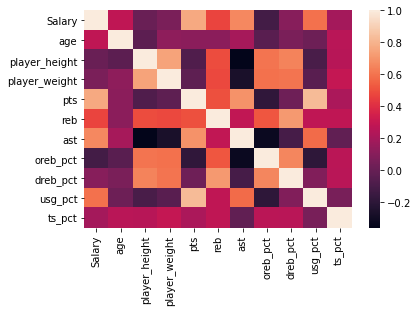

In [318]:
# check for multilinearity
import seaborn as sns
sns.heatmap(nba.corr())

We can see that there are some features that have correlation greater than 0.7, which results in multi-colinearity. Hence, we need to apply PCA to reduct the dimension of our inputs. We will do it after splitting the data and building a model without PCA.

In [319]:
# separate the data into label and train set.
data_label = np.array(nba["Salary"])
data_train = nba.drop(columns = ["Salary","Player","team"])

## Train, Test Spliting

In [320]:
from sklearn.model_selection import train_test_split
train_set,test_set,y_train,y_test = train_test_split(data_train,data_label,test_size=0.25,train_size=0.75)
print("The shape of our training set: " + str(train_set.shape))
print("The shape of our testing set: " + str(test_set.shape))

The shape of our training set: (278, 10)
The shape of our testing set: (93, 10)


## Defining metrics

In [321]:
import sklearn.metrics as metrics

In [322]:
def regression_results(y_true, y_pred):
    '''
    measure the accuracy of the regression model with variance score, mean absolute error, 
    mean sequared error, median absolute error, and r2 error. Print the scores and error.
    Args:
        y_true: array. 
        y_pred: array.
    Return:
        None
    '''
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('Mean Absolute Error: ', round(mean_absolute_error,4))
    print('Mean Squared Error: ', round(mse,4))
    print('Root Mean Squared Error: ', round(np.sqrt(mse),4))

## Linear Regression

Let's try to see what it looks like before applying PCA.

In [323]:
# build a linear regression model and fit it to the training set
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
lrg.fit(train_set,y_train)

LinearRegression()

In [324]:
# test the regression model
y_lrg = lrg.predict(test_set)
regression_results(y_test, y_lrg)

explained_variance:  0.6027
r2:  0.5959
Mean Absolute Error:  4570119.8149
Mean Squared Error:  31364455572025.586
Root Mean Squared Error:  5600397.8048


In [325]:
# fit a linear model using the Ordinary Least Squares
import statsmodels.api as sm
X2 = sm.add_constant(test_set)
est = sm.OLS(y_test, X2)
estimate = est.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     14.52
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.88e-14
Time:                        09:51:41   Log-Likelihood:                -1571.8
No. Observations:                  93   AIC:                             3166.
Df Residuals:                      82   BIC:                             3193.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.463e+07   2.69e+07     -0.916

## Principle Component Analysis

                    PC0       PC1       PC2       PC3       PC4       PC5  \
age            0.051018  0.144226  0.789478 -0.483455 -0.191398  0.192883   
player_height  0.446506 -0.090997 -0.107522  0.067353 -0.392510 -0.259103   
player_weight  0.439274 -0.042136  0.046808 -0.012066 -0.506451 -0.267800   
pts            0.012556  0.571071 -0.079999  0.177362 -0.116743 -0.121409   
reb            0.385148  0.306408 -0.117550 -0.204675  0.308946 -0.275308   
ast           -0.130783  0.502948  0.005572 -0.259247  0.247758 -0.396187   
oreb_pct       0.428751 -0.123746 -0.087961 -0.054011  0.391883  0.235562   
dreb_pct       0.450730  0.056931 -0.113999 -0.221894  0.195001  0.427449   
usg_pct       -0.016897  0.512002 -0.219296  0.158952 -0.346995  0.581237   
ts_pct         0.228465  0.124411  0.523354  0.737300  0.265231 -0.020171   

                    PC6       PC7       PC8       PC9  
age           -0.032471 -0.205598  0.049273 -0.001041  
player_height  0.269528 -0.293670  0.629

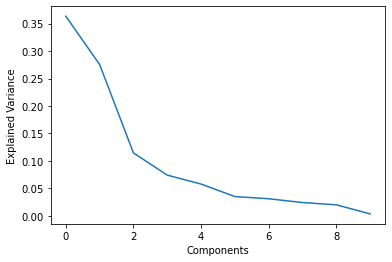

In [326]:
from sklearn.decomposition import PCA

# Since there are some features that have multi-colinearity, 
# we can use PCA to reduce the dimensions of our input.
df = data_train
df_normalized=(data_train - data_train.mean()) / data_train.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))], index=df.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

## Linear Regression(After applying PCA)

In [327]:
# reduce the features to two and then let's see how it works with our model
pca = PCA(n_components=2) 
pca.fit_transform(train_set)
train_set2 = pca.transform(train_set)
test_set2 = pca.transform(test_set)
lrg_new = LinearRegression()
lrg_new.fit(train_set2,y_train)
y_lrg_new = lrg_new.predict(test_set2)
regression_results(y_test,y_lrg_new)

explained_variance:  0.5667
r2:  0.5497
Mean Absolute Error:  4533611.6851
Mean Squared Error:  34944211817136.5
Root Mean Squared Error:  5911362.9407


## AdaBoost

In [328]:
# build an AdaBoost Regression model and check its performance
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(train_set2,y_train)
y_ada = ada.predict(test_set2)
regression_results(y_test,y_ada)

explained_variance:  0.5684
r2:  0.5533
Mean Absolute Error:  4031669.2709
Mean Squared Error:  34666194402025.184
Root Mean Squared Error:  5887800.4723


## RandomForest

In [329]:
# build a random forest model and check its performance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2,random_state=0)
rfr.fit(train_set2,y_train)
y_rfr = rfr.predict(test_set2)
regression_results(y_test, y_rfr)

explained_variance:  0.5679
r2:  0.5644
Mean Absolute Error:  4176951.1678
Mean Squared Error:  33805909119480.902
Root Mean Squared Error:  5814284.919


## Cross Validation

In [330]:
from sklearn.model_selection import cross_validate
cv_lrg = cross_validate(lrg_new, train_set, y_train, cv=8,scoring=('r2','neg_mean_absolute_error'),
return_train_score=True)
cv_lrg

{'fit_time': array([0.00246382, 0.00128889, 0.00180793, 0.00249171, 0.00183201,
        0.00166512, 0.00325608, 0.00166988]),
 'score_time': array([0.00137401, 0.00107121, 0.00109196, 0.0010941 , 0.00094008,
        0.0008688 , 0.00116205, 0.00087214]),
 'test_r2': array([0.71551861, 0.70167597, 0.61939908, 0.39452994, 0.53852666,
        0.78673437, 0.58300957, 0.68969868]),
 'train_r2': array([0.69023336, 0.69178731, 0.70403464, 0.71710499, 0.71319375,
        0.67586047, 0.70563956, 0.69474681]),
 'test_neg_mean_absolute_error': array([-4450599.63953212, -4466677.48211234, -4742753.61577983,
        -5152627.77103011, -5481893.71045916, -4625658.7198419 ,
        -4448416.20281597, -4203463.41594356]),
 'train_neg_mean_absolute_error': array([-4376309.12814235, -4373632.03784132, -4326292.61351733,
        -4265468.02659397, -4210545.67285469, -4377477.57687152,
        -4429258.05424172, -4392250.98608895])}

In [331]:
print("We have a mean r2 score for the linear Regression method: " , cv_lrg['test_r2'].mean())

We have a mean r2 score for the linear Regression method:  0.6286366101074853


In [332]:
cv_rfr = cross_validate(rfr, train_set, y_train, cv=4,scoring=('r2','neg_mean_absolute_error'),
return_train_score=True)
cv_rfr

{'fit_time': array([0.07512498, 0.07141018, 0.06817198, 0.0671792 ]),
 'score_time': array([0.00469589, 0.00469875, 0.00441098, 0.00437403]),
 'test_r2': array([0.63237257, 0.50708996, 0.61476339, 0.69342295]),
 'train_r2': array([0.73385774, 0.75502867, 0.73117542, 0.72320069]),
 'test_neg_mean_absolute_error': array([-4633995.27472133, -5016017.35474088, -4969515.26152615,
        -3737689.62530331]),
 'train_neg_mean_absolute_error': array([-3912211.18414177, -3792292.48798014, -3833095.90769681,
        -4082697.40060936])}

In [333]:
print("We have a mean r2 score for the Random Forest method: " , cv_rfr['test_r2'].mean())

We have a mean r2 score for the Random Forest method:  0.6119122163873747


In [334]:
cv_ada = cross_validate(ada, train_set, y_train, cv=4,scoring=('r2','neg_mean_absolute_error'),
return_train_score=True)
cv_ada

{'fit_time': array([0.04080105, 0.0369041 , 0.03599405, 0.03634882]),
 'score_time': array([0.00285006, 0.0028131 , 0.00284171, 0.0028491 ]),
 'test_r2': array([0.66251787, 0.57216491, 0.70450072, 0.5393136 ]),
 'train_r2': array([0.85782789, 0.88048098, 0.86287325, 0.83955539]),
 'test_neg_mean_absolute_error': array([-4879680.92619045, -4961353.58712104, -4836265.67177726,
        -4787624.38069077]),
 'train_neg_mean_absolute_error': array([-3553962.68932951, -3267705.50766913, -3311956.97807655,
        -3767308.13382904])}

In [335]:
print("We have a mean r2 score for the adaboost method: " , cv_ada['test_r2'].mean())

We have a mean r2 score for the adaboost method:  0.619624275077064


According to our cross validation, we found out that linear regression method will always have a higher r2 score on average. However, the difference in r2 value is relatively small. The three models' performance are around the same; therefore, looking for other models to achive our goal to predict salaray for NBA players can increase our performance.